In [8]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data)
trial_data = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
mouse_clinical_df = pd.merge(trial_data,mouse_data,on='Mouse ID',how='left')

# Display the data table for preview
mouse_clinical_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tv = mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()
mean_tv
# Convert to DataFrame
mean_tv_df = pd.DataFrame(mean_tv) 
# Preview DataFrame
mean_tv_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_se = mouse_clinical_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem().reset_index()
# Convert to DataFrame
tumor_vol_se_df = pd.DataFrame(tumor_vol_se)
# Preview DataFrame
tumor_vol_se_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mean_tv_df = mean_tv_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
# Preview that Reformatting worked
pivot_mean_tv_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


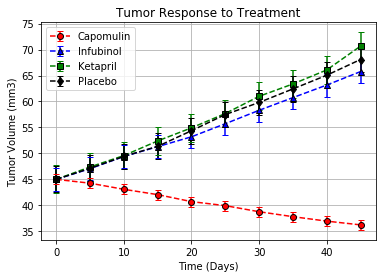

In [13]:
# Setting the lists of drugs, colors and markers respectively
drugs=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["red","blue","green","black"]
markers=["o","^","s","d"]

for drug in drugs:
    # Setting the x_axis data,y_axis data and standard error of the mean for the graph
    x_data=pivot_mean_tv_df.index.values
    y_data=pivot_mean_tv_df[drug] 
    err=sem(pivot_mean_tv_df[drug])
    
    index=drugs.index(drug)
 
    plt.errorbar(x_data, y_data,err,linestyle="--",color=colors[index],
                marker=markers[index],capsize=3,capthick=1,markeredgecolor='black')
    
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])

# Display the graph
plt.show()

## Metastatic Response to Treatment

In [15]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastic_response = mouse_clinical_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean().reset_index()

# Convert to DataFrame
metastic_df = pd.DataFrame(metastic_response) 
# Preview DataFrame
metastic_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [16]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
metastic_se = mouse_clinical_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem().reset_index()
# Convert to DataFrame
metastic_se_df = pd.DataFrame(metastic_se)
# Preview DataFrame
metastic_se_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [17]:
# Minor Data Munging to Re-Format the Data Frames
pivot_metastic_df = metastic_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
# Preview that Reformatting worked
pivot_metastic_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


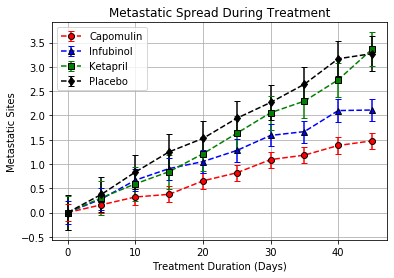

<Figure size 432x288 with 0 Axes>

In [23]:
# Setting the lists of drugs, colors and markers respectively
drugs=["Capomulin","Infubinol","Ketapril","Placebo"]
colors=["red","blue","green","black"]
markers=["o","^","s","d"]

for drug in drugs:
    # Setting the x_axis data,y_axis data and standard error of the mean for the graph
    x_data=pivot_metastic_df.index.values
    y_data=pivot_metastic_df[drug] 
    err=sem(pivot_metastic_df[drug])
    
    index=drugs.index(drug)
 
    plt.errorbar(x_data, y_data,err,linestyle="--",color=colors[index],
                marker=markers[index],capsize=3,capthick=1,markeredgecolor='black')
    
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])
# Show the Figure
plt.show()

# Save the Figure
plt.savefig('metastic_spread.png')

## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_df = mouse_clinical_df.groupby(['Drug','Timepoint'])['Mouse ID']
count_mice_df = mice_df.nunique()
count_mice_df = pd.DataFrame(count_mice_df)

# Convert to DataFrame
count_mice_df.reset_index(inplace=True)
count_mice_df=count_mice_df.rename(columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
count_mice_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [20]:
# Minor Data Munging to Re-Format the Data Frames
pivot_count_mice_df = count_mice_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')

# Preview the Data Frame
pivot_count_mice_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


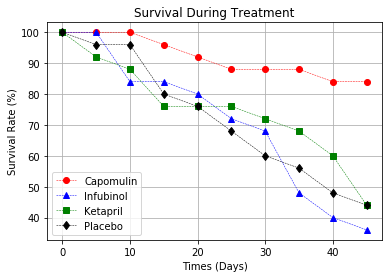

In [21]:
# Generate the Plot (with Error Bars)
drug_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
for drug,marker,colors in drug_format_list:
    total_mouse = pivot_count_mice_df[drug][0]
    survival_rate = (pivot_count_mice_df[drug]/total_mouse)*100
    survival_treatment_graph = plt.plot(pivot_count_mice_df.index,survival_rate,
                                       marker=marker,ls='--',color=colors,linewidth=0.5)

# Show the Figure
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])
plt.show()



## Summary Bar Graph

In [83]:
# Calculate the percent changes for each drug
percentage_changes = (pivot_mean_tv_df.iloc[-1]/(pivot_mean_tv_df.iloc[0])-1)*100
# Display the data to confirm
percentage_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

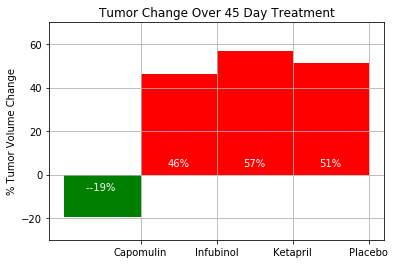

In [84]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (percentage_changes["Capomulin"], percentage_changes["Infubinol"], percentage_changes["Ketapril"], percentage_changes["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("Tumor_Change.png")

# Show the Figure
fig.show()

In [ ]:
#Notes

#Capomulin is the ost promising drug from the study based on the data presented in the graphs and summerized below:
    #Capomulin decreased tumors by an aveage of 19%.
    #Had the highest survival rate in days.
    #The least metastic spread over 45 days.
    #The greatest tumor response.
    
#Other drugs observed only faired marginally better or worse than the placebo.